# **Logistic Regression with Many Features in Code (Two Inputs, Two Classes)**

### **1. What Logistic Regression Is Doing in Code**

Logistic regression is a machine learning model used to **classify things** — that means it predicts categories, like “class 0” or “class 1”. In this case, the categories are two different species of iris flowers.

When you use **two input features** instead of one (e.g., *petal length* and *petal width*), you’re giving the model more information to help it decide which class a flower belongs to. 

In code, the approach is almost the same as when you used one feature:

1. Load data
2. Pick which inputs (features) you want
3. Create a logistic regression model
4. Train (fit) the model
5. Get the learned coefficients from the model
6. Optionally visualize the decision region

This doesn’t change fundamentally — only now we have two numbers per example instead of one.


### **2. Python Implementation (Step‑by‑Step)**

In [1]:
# Here is a simple, beginner‑friendly Python flow for doing logistic regression with petal length & petal width:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# 1. Load the iris data
iris = load_iris()
X_full = iris["data"]      # all features
y_full = iris["target"]    # species labels

# 2. Filter for only two classes (e.g., versicolor and virginica)
mask = (y_full == 1) | (y_full == 2)
X_two_classes = X_full[mask]
y_two_classes = y_full[mask]

# 3. Pick only two features: petal length (index 2) and petal width (index 3)
X = X_two_classes[:, [2, 3]]
y = y_two_classes

# 4. Train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# 5. Retrieve the learned parameters
intercept = model.intercept_  # beta0
coefficients = model.coef_     # beta1, beta2

print("Intercept (beta0):", intercept)
print("Coefficients (beta1, beta2):", coefficients)

Intercept (beta0): [-17.55814728]
Coefficients (beta1, beta2): [[2.77980871 2.38512529]]


#### What These Lines Mean

* `fit(X, y)` tells scikit‑learn to *train the model* using X (features) and y (labels).
* After training:

  * `intercept_` is the **model’s bias term** (beta0).
  * `coef_` is a list of weights (one weight per input feature). ([Scikit-learn][2])


### **3. Making a Decision Boundary Plot**

Once the model is trained, we can *visualize* what it learned. Because we have two input features, we can draw something called a **decision boundary**. This is a line that shows where the model changes its classification from class 1 to class 2. 

Here’s code that builds such a plot:

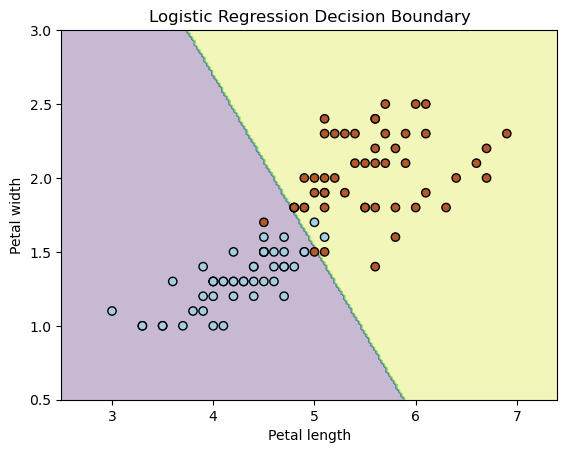

In [2]:
# Create a grid over the feature space
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten the grid and combine
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict for each grid point
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot the original training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Logistic Regression Decision Boundary")
plt.show()

#### What’s Happening in the Plot

* A background color shows *which class* the model would predict for each point in the space.
* The model draws a **line‑like boundary** between classes — because logistic regression with 2 features draws a *straight line* in feature space. 
* Real data usually isn’t perfectly separable, so you will see some overlap. Logistic regression finds the line that best divides the classes.

### **4. Why Use Two Features?**

Using two features instead of one gives the model **more information** to decide.
If one feature alone wasn’t enough to separate the classes well, adding a second one may help the model draw a better boundary.

In the iris dataset, petal length and width together do a better job of separating versicolor and virginica than either one alone.

### **5. Interpretation of Model Outputs**

After training:

* The model produces **weights (coefficients)** for each feature.

  * These weights tell the model *how strongly each feature should push the prediction toward one class or the other*.
* The model also learns an **intercept (bias)**.
* The final decision boundary uses all these numbers.

### **6. How the Decision Boundary Works**

In two dimensions, the logistic regression decision boundary is a **line**. It is the set of points for which the model predicts exactly 50% probability of belonging to either class. 

On one side of that line, the model predicts class 1; on the other side, class 2.

Even though the model outputs probability curves, the boundary itself is linear (a straight line) in feature space because the logistic function uses a linear combination of inputs before applying the sigmoid transformation. 

### **7. More Realistic Notes**

* Scikit‑learn’s `LogisticRegression` uses **regularization by default** (to prevent coefficients from becoming too large). That means the parameter `C` controls regularization strength. Lower C → stronger regularization. ([Turan International University][4])
* When training on more than two classes, scikit‑learn uses either **one‑vs‑rest** or **softmax** internally, but here we stick to binary. (

## **Summary**

- Logistic regression can handle *multiple features* by learning one coefficient per feature.
- In code, you train the model with `fit()` and then retrieve learned coefficients.
- With two inputs, you can draw a **2D decision boundary** (a line) that separates two classes.
- Logistic regression works by mapping feature combinations through a sigmoid to produce probabilities.
- Regularization is applied to keep the model stable and prevent exploding coefficients. 

Sources:

[1](https://bcebakhtiyarpur.ac.in/wp-content/uploads/2020/03/file_5e748501c810d.pdf?utm_source=chatgpt.com "Hands-On Machine Learning with Scikit-Learn")
[2](https://scikit-learn.org/1.0/auto_examples/linear_model/plot_iris_logistic.html?utm_source=chatgpt.com "Logistic Regression 3-class Classifier — scikit-learn 1.0.2 documentation")
[3](https://gavinln.github.io/blog-site/post/scikit-logistic_reg-iris/?utm_source=chatgpt.com "Logistic regression on the Iris data set · Human Learning Machine Learning")
[4](https://tiu-edu.uz/media/books/2024/05/27/Aurelien_Geron_Hands_On_Machine_Learning_with_Scikit_Learn_Keras.pdf?utm_source=chatgpt.com "SECOND EDITION")
